In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
            cities.append(city)
len(cities)

620

In [7]:
from pip._vendor import requests
from config import weather_api_key
url = "https://api.openweathermap.org/data/2.5/weather?lat=units=Imperial&appid=" + weather_api_key
import time
from datetime import datetime

In [8]:
# city_data = []
# print("Beginning Data Retrieval     ")
# print("_____________________________")
# # Create the counters
# record_count = 1
# set_count = 1
# # Loop through all the cities in our list
# # Loop through all the cities in the list.
# for i, city in enumerate(cities):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + city.replace(" ","+")

#     # Log the URL, record, and set numbers and the city.
#     print(f"Processing Record {record_count} of Set {set_count} | {city}")
#     # Add 1 to the record count.
#     record_count += 1
#     try:
#         # Parse the JSON and retrieve data.
#         city_weather = requests.get(city_url).json()
#         # Parse out the needed data.
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp_max"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_country = city_weather["sys"]["country"]
#         # Convert the date to ISO standard.
#         city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
#         # Append the city information into city_data list.
#         city_data.append({"City": city.title(),
#                           "Lat": city_lat,
#                           "Lng": city_lng,
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})
#     except:
#         print("City not found. Skipping...")
#         pass

# # Indicate that Data Loading is complete.
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [9]:
# len(city_data)

In [10]:
# city_data_df = pd.DataFrame(city_data)
# city_data_df.head()

In [11]:
# new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
# city_data_df = city_data_df[new_column_order]
# city_data_df.head()

In [12]:
# # Create the output CSV
# output_weather_file = 'weather_data/cities.csv'
# city_data_df.to_csv(output_weather_file, index_label="City_ID")


In [86]:
city_data_df = pd.read_csv('weather_data/cities.csv')
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Mahebourg,MU,2022-12-07 23:25:34,-20.4081,57.7000,298.31,83,75,5.66
1,1,Rikitea,PF,2022-12-07 23:25:34,-23.1203,-134.9692,297.38,78,16,8.84
2,2,Valvedditturai,LK,2022-12-07 23:25:35,9.8167,80.1667,298.91,65,100,9.30
3,3,Saint-Philippe,RE,2022-12-07 23:25:35,-21.3585,55.7679,296.92,87,38,6.98
4,4,Santa Cruz Cabralia,BR,2022-12-07 23:25:36,-16.2781,-39.0247,298.28,88,40,3.60
...,...,...,...,...,...,...,...,...,...,...
529,529,Katangli,RU,2022-12-07 23:41:33,51.7102,143.2326,253.29,97,43,3.44
530,530,Leningradskiy,RU,2022-12-07 23:41:33,69.3833,178.4167,250.95,97,100,3.55
531,531,Samarinda,ID,2022-12-07 23:41:34,-0.5000,117.1500,297.37,94,100,0.51
532,532,Hornepayne,CA,2022-12-07 23:41:34,49.2138,-84.7705,252.62,97,72,1.37


In [87]:
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [88]:
# convert "Max Temp" from Kelvin to Farenheit

city_data_df['Max Temp'] = (city_data_df['Max Temp'] * (9/5)) - 459.67
city_data_df.head()


,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Mahebourg,MU,2022-12-07 23:25:34,-20.4081,57.7000,77.288,83,75,5.66
1,1,Rikitea,PF,2022-12-07 23:25:34,-23.1203,-134.9692,75.614,78,16,8.84
2,2,Valvedditturai,LK,2022-12-07 23:25:35,9.8167,80.1667,78.368,65,100,9.30
3,3,Saint-Philippe,RE,2022-12-07 23:25:35,-21.3585,55.7679,74.786,87,38,6.98
4,4,Santa Cruz Cabralia,BR,2022-12-07 23:25:36,-16.2781,-39.0247,77.234,88,40,3.60


In [53]:
import time
today = time.time()


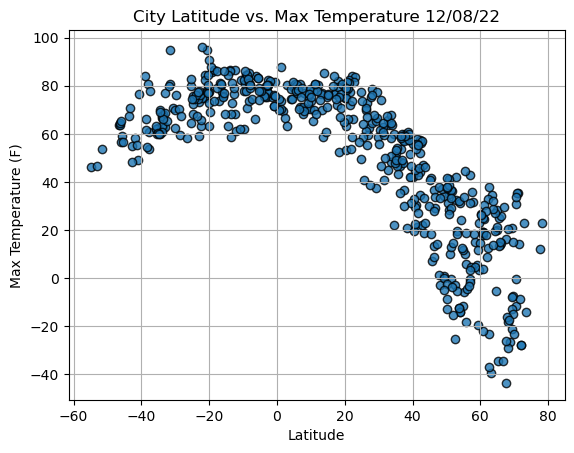

In [90]:
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show()

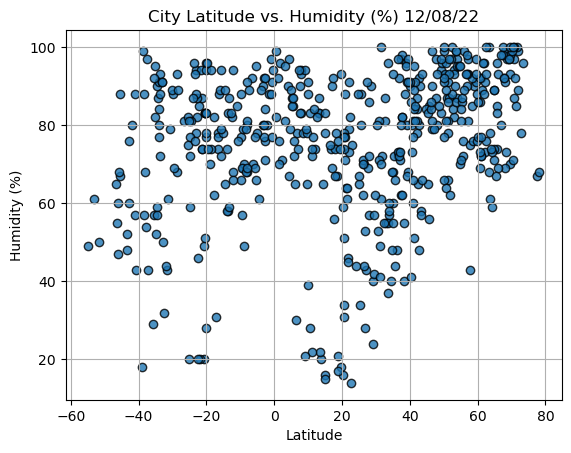

In [91]:
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")
plt.show()

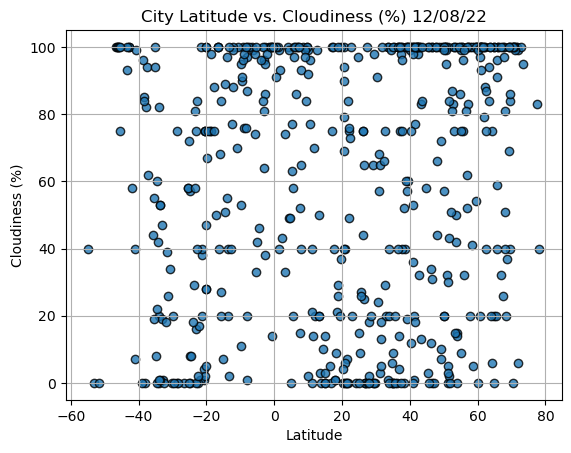

In [92]:
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")
plt.show()

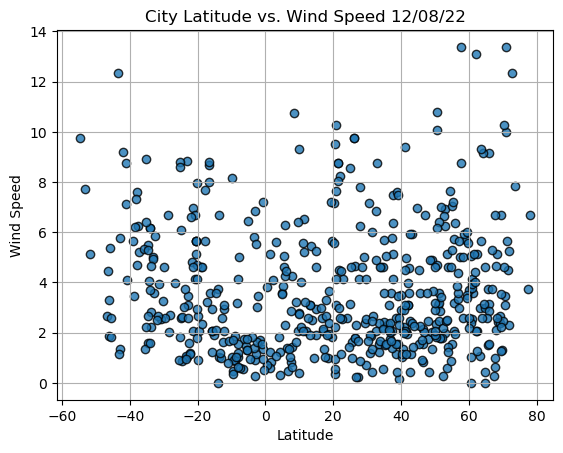

In [93]:
plt.scatter(lats, 
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")
plt.show()

In [105]:
from scipy.stats import linregress

# Create a function to perfrom linear regression on the weather 
# data and plot a regression line and the equation.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of a line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot with regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [106]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

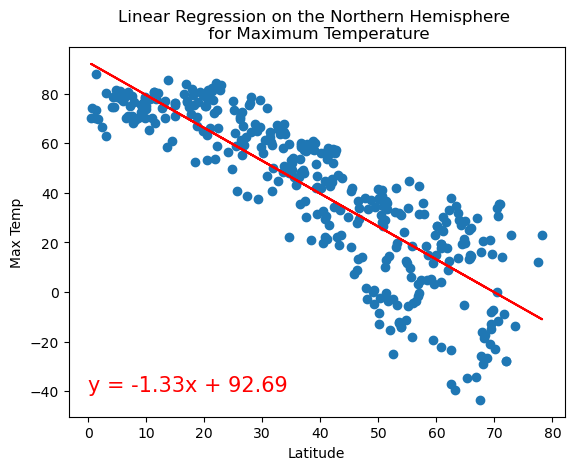

In [118]:
# Linear regression in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(
    x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (0, -40))


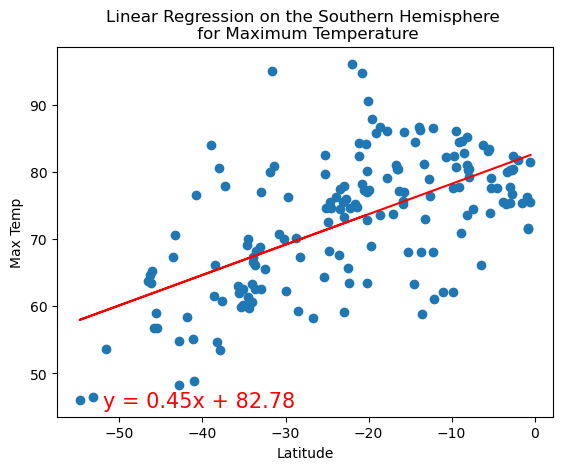

In [138]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-52,45))

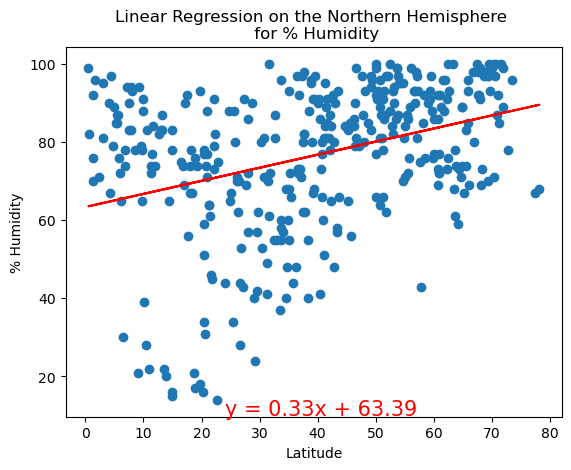

In [142]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(24,10))

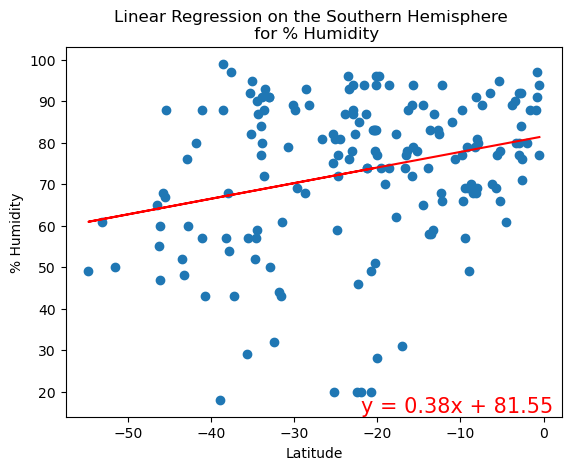

In [147]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-22,15))

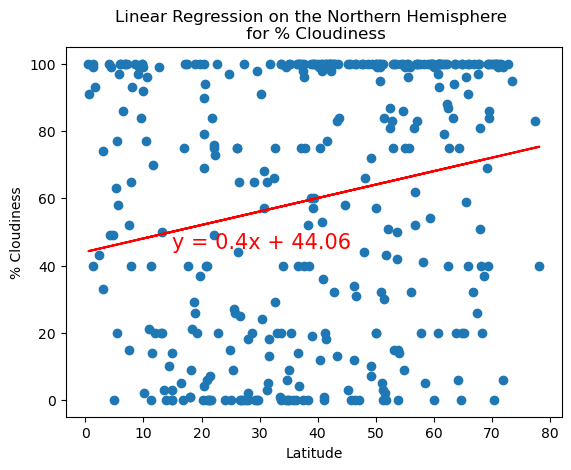

In [152]:
# Linear regression on the northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(15,45))

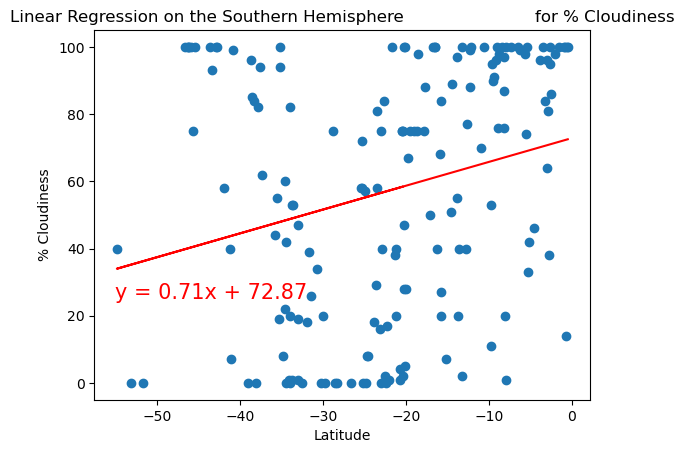

In [154]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,25))

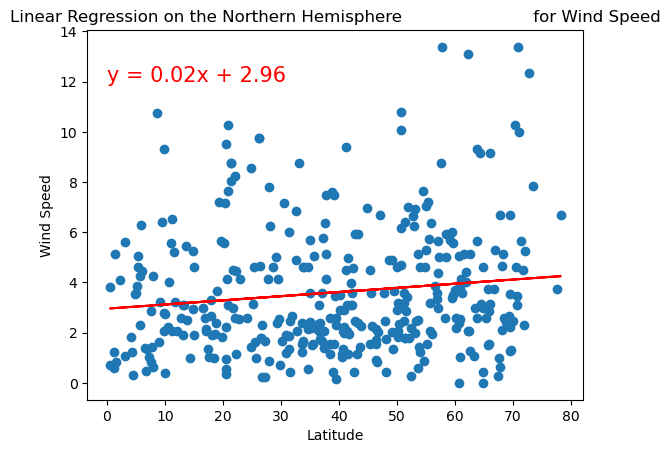

In [159]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,12))

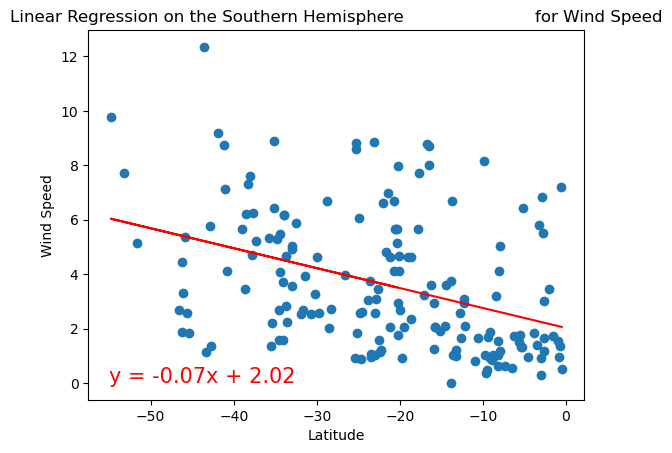

In [162]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,0))